In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
cust=pd.read_csv("Mall_Customers.csv")

In [138]:
cust.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [140]:
cust["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Spending Score Distribution')

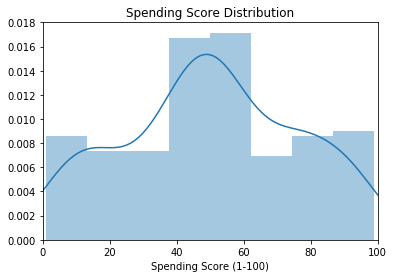

In [141]:
%matplotlib inline
sns.distplot(cust["Spending Score (1-100)"])
plt.xlim(0,100)
#plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90,100])
plt.title("Spending Score Distribution")

Text(0.5, 1.0, 'Age Distribution of Customers')

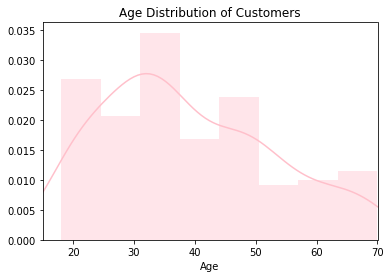

In [142]:
sns.distplot(cust["Age"],color="pink")
plt.xlim(15,70)
plt.title("Age Distribution of Customers")

Text(0.5, 1.0, ' Spending Score vs Age')

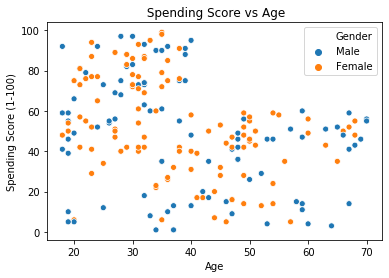

In [143]:
%matplotlib inline
sns.scatterplot(cust["Age"],cust["Spending Score (1-100)"],color="green",hue=cust["Gender"])
plt.title(" Spending Score vs Age")

# Higher spending scores are assigned to indvidual between the age of 20 to 40. Age is a very important factor in determining clusters

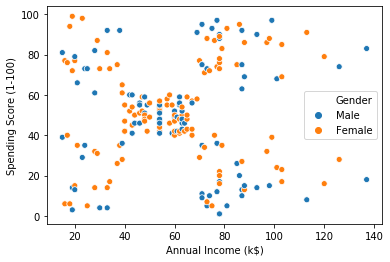

In [144]:
sns.scatterplot(x=cust["Annual Income (k$)"],y=cust["Spending Score (1-100)"],hue=cust["Gender"])

# Annual Income does not have a huge impact on the spending score

In [145]:
cust=cust.drop('CustomerID',axis=1)
#cust.head(5)

In [146]:
cust.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [147]:
corr=cust.corr()

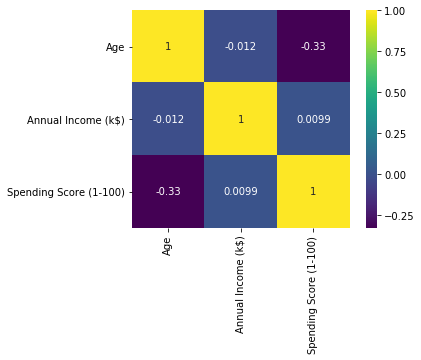

In [148]:
sns.heatmap(data=corr,square=True,cmap="viridis",annot=True)

# Data Processing

In [149]:
cust=pd.get_dummies(cust,columns=["Gender"],drop_first=True)
cust.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [150]:
cust.columns=["Age","Annual Income","Spending Score","Gender"]
cust.head(5)

,Age,Annual Income,Spending Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [151]:
cust_transform=cust.copy()

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [153]:
scaler=StandardScaler()

In [154]:
cust_transform["Age"]=scaler.fit_transform(cust["Age"].values.reshape(-1,1))
cust_transform["Annual Income"]=scaler.fit_transform(cust["Annual Income"].values.reshape(-1,1))
cust_transform["Spending Score"]=scaler.fit_transform(cust["Spending Score"].values.reshape(-1,1))

Text(0.5, 1.0, 'Tranformed Data (Spending Score vs Age)')

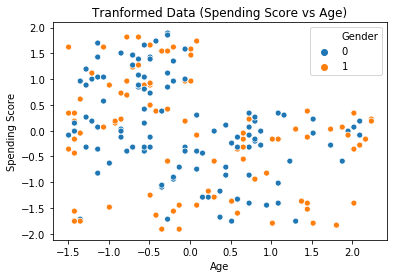

In [155]:
sns.scatterplot(cust_transform["Age"],cust_transform["Spending Score"],hue=cust_transform["Gender"],color="pink")
plt.title("Tranformed Data (Spending Score vs Age)")

Text(0.5, 1.0, 'Tranformed Data (Annual Income vs Age)')

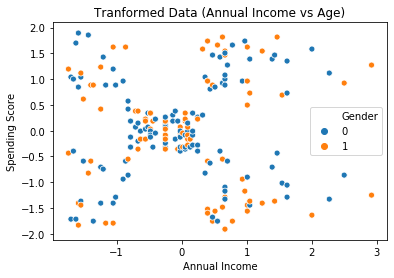

In [156]:
sns.scatterplot(cust_transform["Annual Income"],cust_transform["Spending Score"],hue=cust_transform["Gender"],color="pink")
plt.title("Tranformed Data (Annual Income vs Age)")

Text(0.5, 1.0, 'The Elbow method')

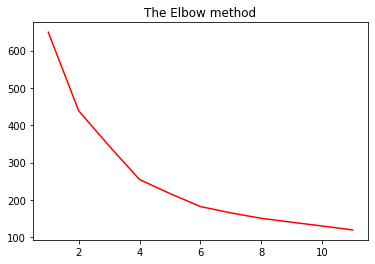

In [160]:
wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i).fit(cust_transform)
    wcss.append(kmeans.inertia_)
    

sns.lineplot(x=range(1,12),y=wcss,color="red")
plt.title("The Elbow method")

In [161]:
kmeans_model=KMeans(n_clusters=5).fit(cust_transform)

In [165]:
kmeans_cluster=kmeans_model.predict(cust_transform)
kmeans_cluster

array([3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 3,
       0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

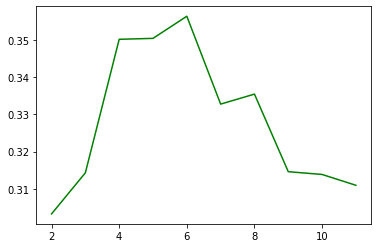

In [170]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for i in range(2,12):
     kmeans = KMeans(n_clusters=i)     
     kmeans.fit(cust_transform)
     score = silhouette_score(cust_transform, kmeans.labels_)
     silhouette_coefficients.append(score)

sns.lineplot(x=range(2,12),y=silhouette_coefficients,color="green")

# Based on the analysis we will go for 6 clusters in the dataset

In [172]:
kmeans_model2=KMeans(n_clusters=6).fit(cust_transform)
kmeans_cluster2=kmeans_model2.predict(cust_transform)

In [178]:
cust=pd.concat([cust,pd.DataFrame({"Cluster Number":kmeans_cluster2})],axis=1)
cust

,Age,Annual Income,Spending Score,Gender,Cluster_Number,Cluster Number
0,19,15,39,1,4,4
1,21,15,81,1,4,4
2,20,16,6,0,3,3
3,23,16,77,0,4,4
4,31,17,40,0,3,3
5,22,17,76,0,4,4
6,35,18,6,0,3,3
7,23,18,94,0,4,4
8,64,19,3,1,3,3
9,30,19,72,0,4,4


In [179]:
cust["Cluster Number"].value_counts()

5    45
2    39
1    38
0    34
4    23
3    21
Name: Cluster Number, dtype: int64

# Data Visualisation of Clusters

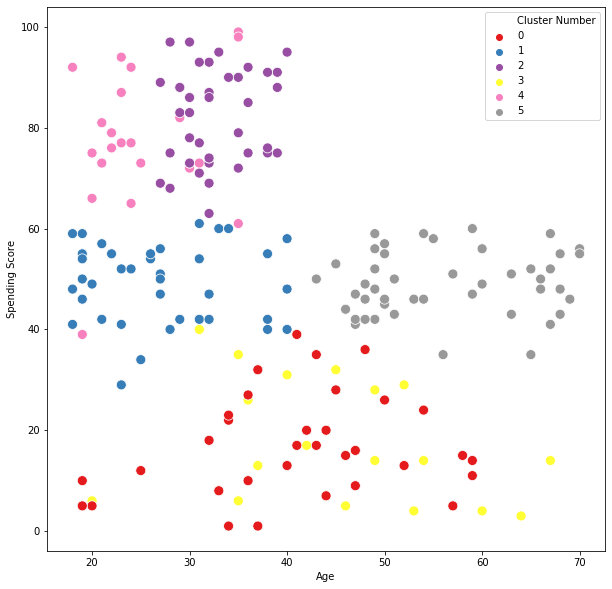

In [203]:
plt.figure(figsize=[10,10])
sns.scatterplot(x=cust["Age"],y=cust["Spending Score"],hue=cust["Cluster Number"],palette="Set1",legend="full",s=100)

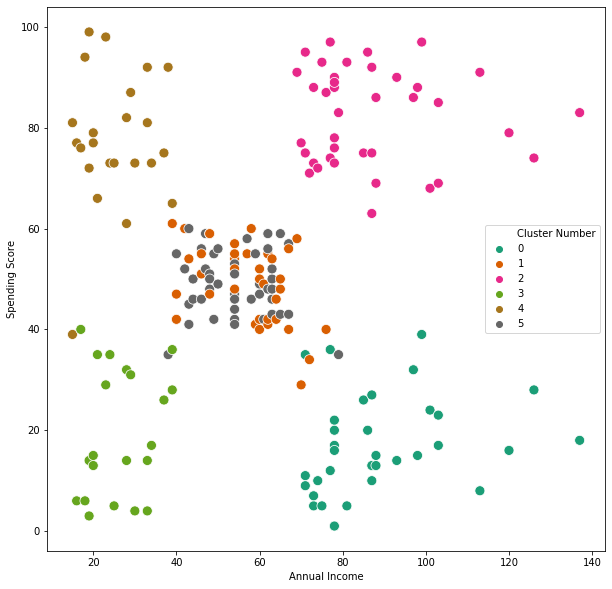

In [201]:
plt.figure(figsize=[10,10])
sns.scatterplot(x=cust["Annual Income"],y=cust["Spending Score"],hue=cust["Cluster Number"],palette="Dark2",legend="full",s=100)

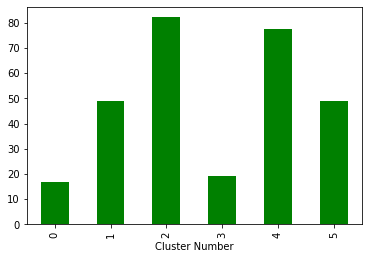

In [206]:
cust.groupby("Cluster Number").mean()["Spending Score"].plot(kind="bar",color="green")

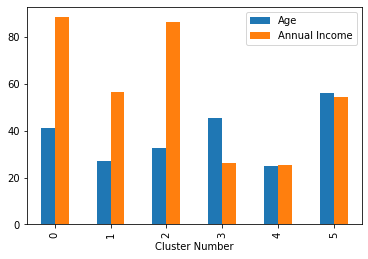

In [208]:
cust.groupby("Cluster Number").mean()[["Age","Annual Income"]].plot(kind="bar")

# Cluster 2 & Cluster 4 are the clusters that have high spending score. Cluster 2 largely comprises of peoeple who have high income & are mid-age. Evaluating Cluster 4 has pretty much the same age but lower income. Both clusters indicate that age is more closely related with spendings score than Income.